In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Chọn một seed để reproduce kết quả
np.random.seed(11)

In [ ]:
# Khởi tạo các cụm true
"""
Mỗi cụm có N = 500 điểm dữ liệu
Toàn bộ dữ liệu có N*3 bằng 1500 điểm
Có số cụm ta muốn phân chia (đúng với true) là K = 3
"""
N = 500
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [ ]:
# Shape của tập dữ liệu ta đang xét
X.shape

(1500, 2)

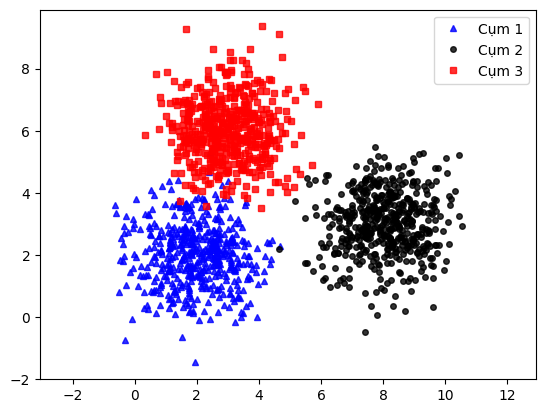

In [ ]:
def kmeans_display(X, label, centers = None):
    """
    Biểu diễn dữ liệu
    :param X: các điểm dữ liệu, np.array, , shape = (N, 2)
    :param label: nhãn cho dữ liệu, np.array, shape = (N,)
    :param centers: các tâm điểm, None (bỏ qua) hoặc np.array, shape = (kk, 2)
    """

    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', label = "Cụm 1", markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ko', label = "Cụm 2", markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', label = "Cụm 3", markersize = 4, alpha = .8)

    if centers is not None:
        plt.plot(centers[:, 0], centers[:, 1], "y*", label = "Centroid", markersize = 16, alpha = 1)
        
    plt.axis('equal')
    plt.plot()
    plt.legend()
    plt.show()
    
kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    """
    Chọn ngẫu nhiên k điểm trong tập dữ liệu X làm tâm điểm
    :param X: tập dữ liệu, shape = (N, 2)
    :param k: số cụm, hay số tâm điểm cần có
    """
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    """
    Cập nhật nhãn cho dữ liệu.
    Được dựa trên tâm gần nhất của nó.
    :param X: tập dữ liệu, shape = (N, 2)
    :param centers: các tâm điểm, shape = (k, 2)
    :return: np.array, shape = (N,)
    """
    # Đưa ra một ndarray, với mỗi điểm bao gồm k khoảng cách đến các tâm điểm tương ứng
    D = cdist(X, centers)
    
    # Trả về index của khoảng cách đến tâm điểm gần nhất
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    """
    Cập nhật tâm điểm của k cụm.
    
    Tâm điểm mới của một cụm là điểm trung bình cộng của các điểm dữ liệu trong cụm đó.
    
    :param X: tập dữ liệu, shape = (N, 2)
    :param labels: nhãn của dữ liệu, shape = (N,)
    :param k: số cụm, hay số tâm điểm cần có
    :return: tâm mới, shape = (k, 2)
    """
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]

        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    """
    Kiểm tra xem thuật toán đã hội tụ chưa.

    :return: bool
    """
    return (set([tuple(a) for a in centers]) == 
            set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    # Khởi tạo các biến
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    count = 0

    # Vòng lặp chính
    while True:
        # Dự đoán các nhãn cho từng điểm dựa trên tâm điểm gần nhất
        labels.append(kmeans_assign_labels(X, centers[-1]))

        # Những tâm điểm mới sẽ là trung bình của những điểm thuộc cụm
        new_centers = kmeans_update_centers(X, labels[-1], K)

        # Dừng chương trình nếu tâm điểm không thay đổi (đã hội tụ)
        if has_converged(centers[-1], new_centers):
            break

        # Nếu chưa hội tụ thì tiếp tục thuật toán
        centers.append(new_centers)
        it += 1
        count += 1
    
    return (centers, labels, it) # Return một tuple với 3 giá trị

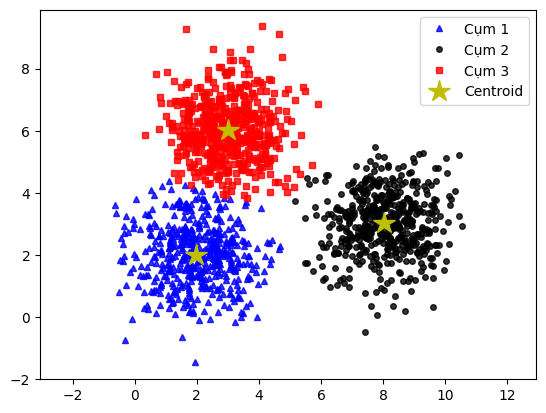

In [ ]:
### ACCEPTABLE RESULT
(centers, labels, it) = kmeans(X, K)

kmeans_display(X, labels[-1], centers = centers[-1])

Loop 0


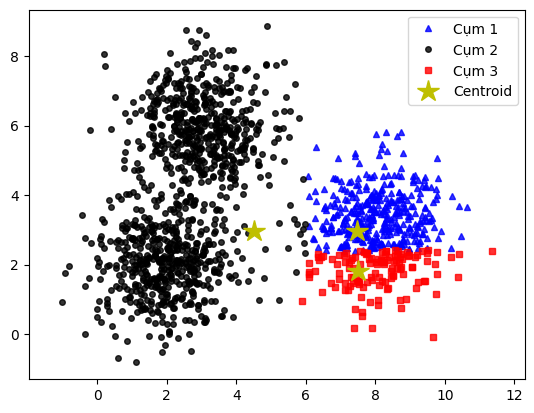

Loop 1


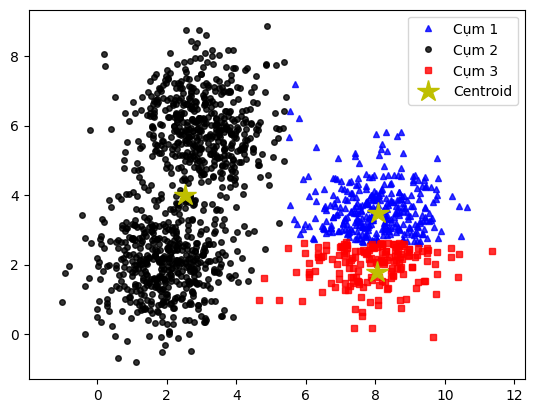

Loop 2


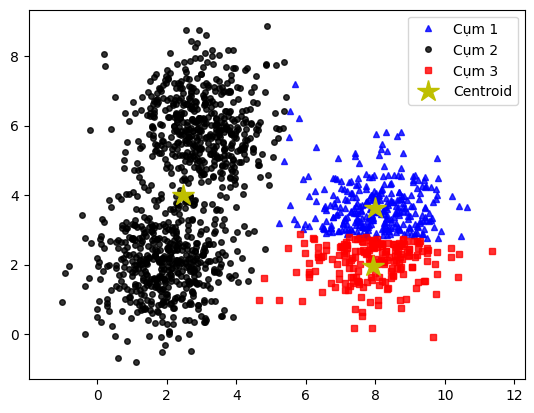

Loop 3


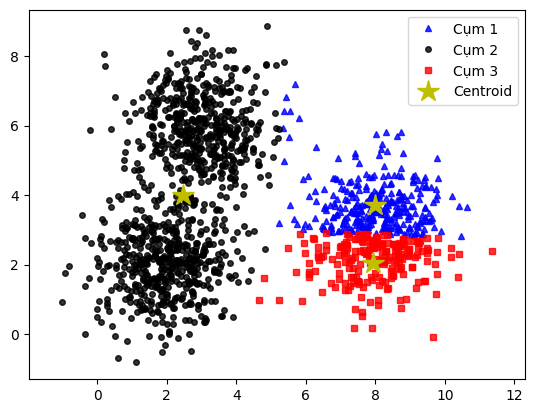

Loop 4


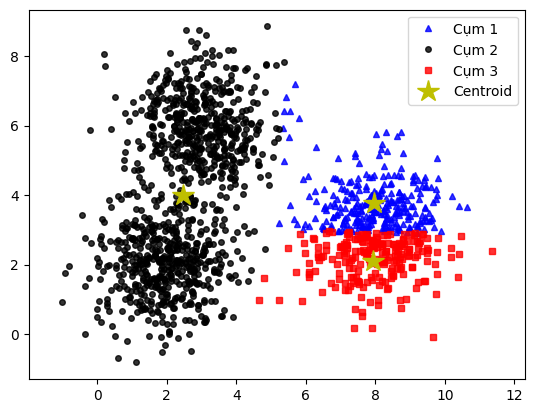

Loop 5


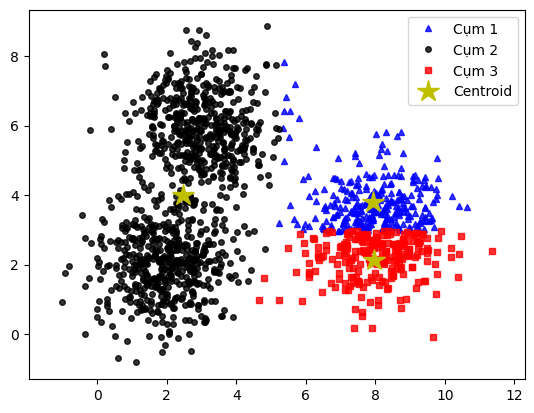

Loop 6


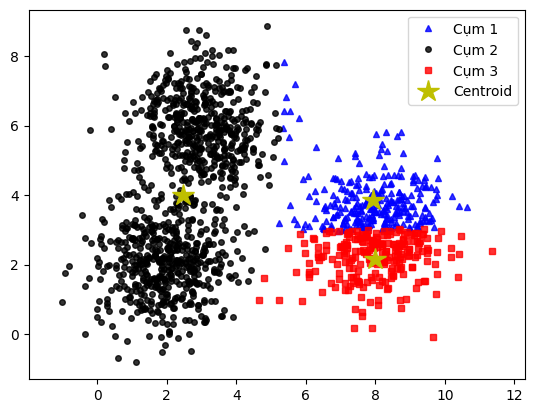

Loop 7


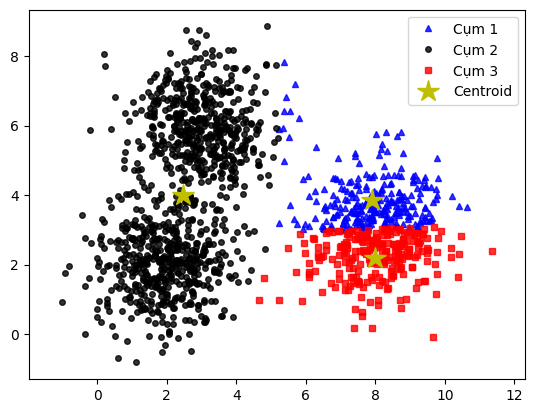

Loop 8


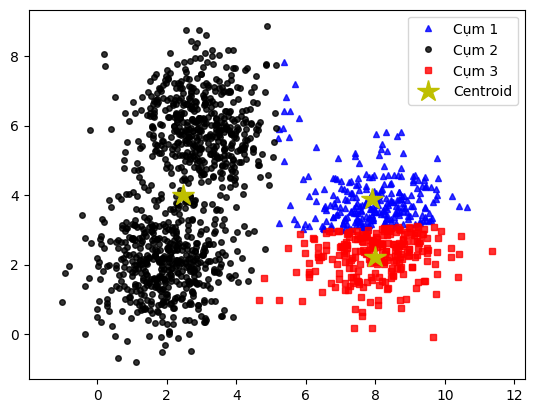

Loop 9


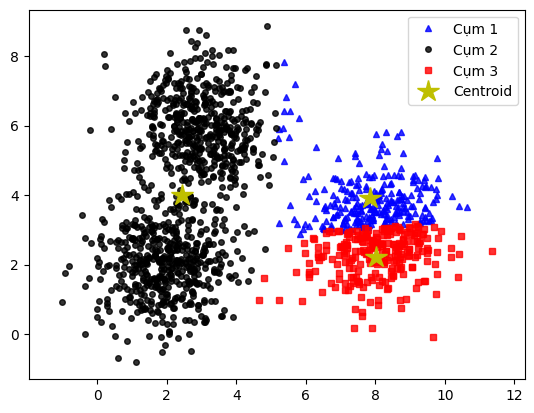

Loop 10


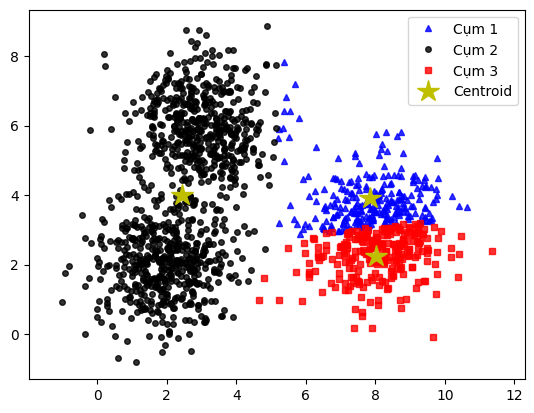

Loop 11


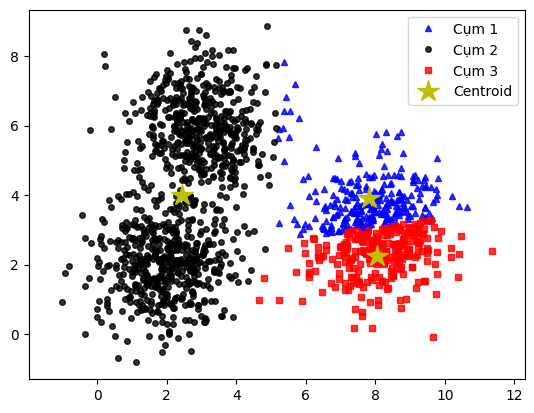

Loop 12


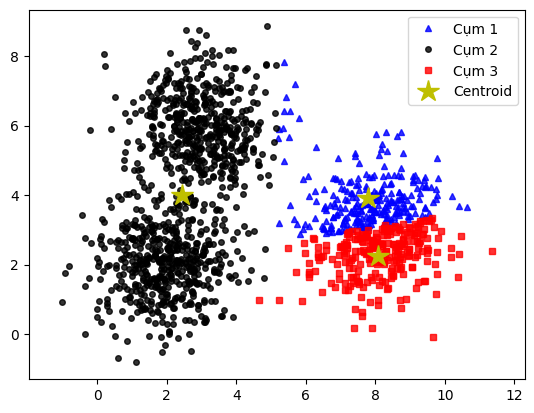

Loop 13


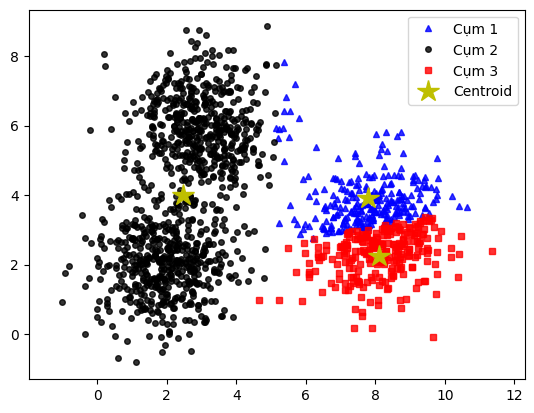

Loop 14


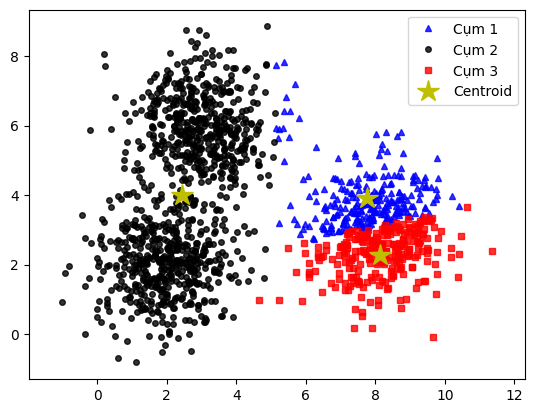

Loop 15


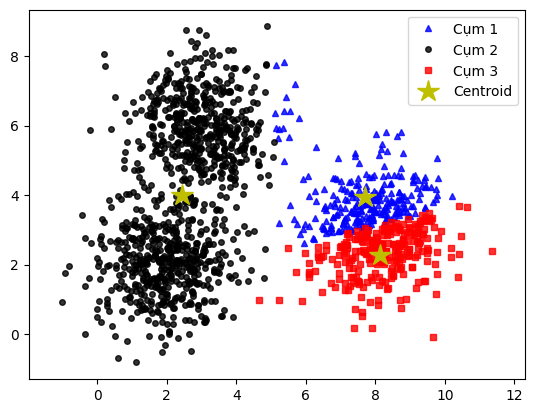

Loop 16


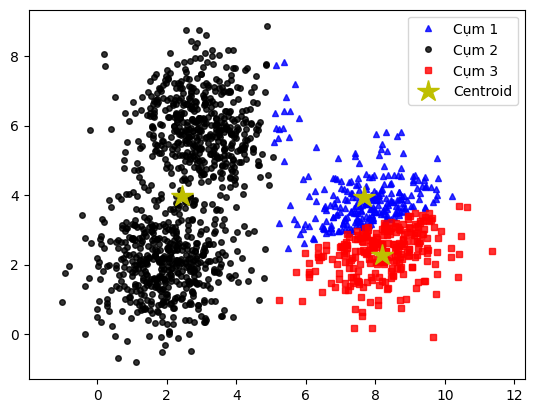

Loop 17


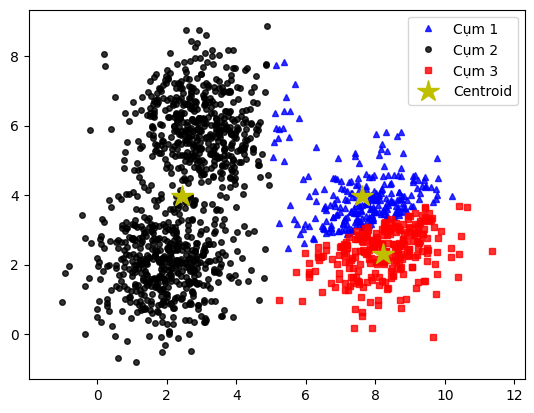

Loop 18


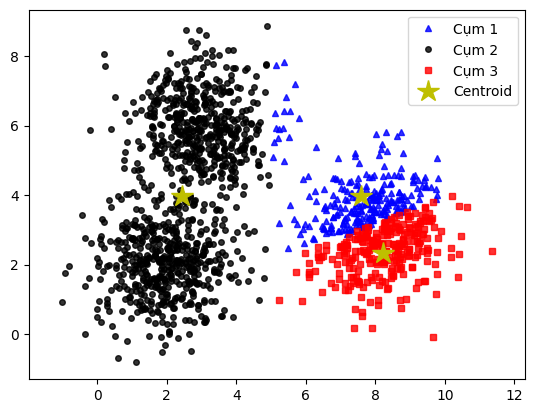

Loop 19


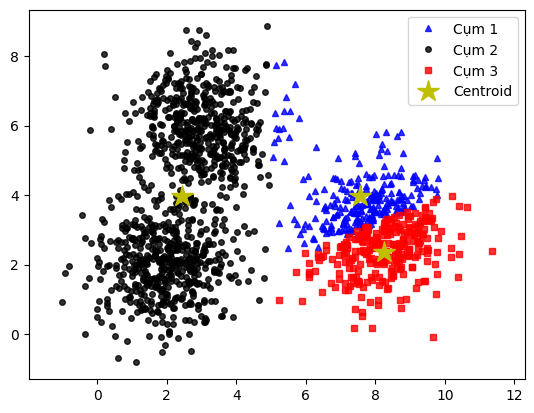

Loop 20


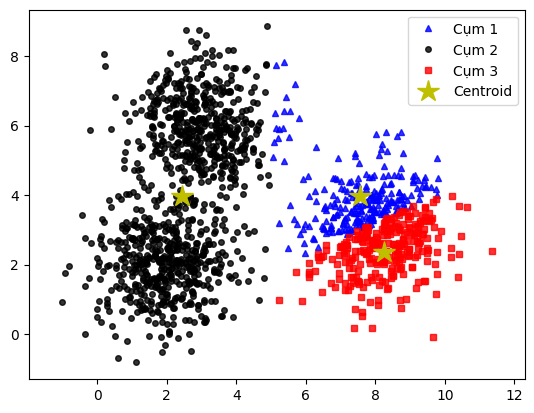

Loop 21


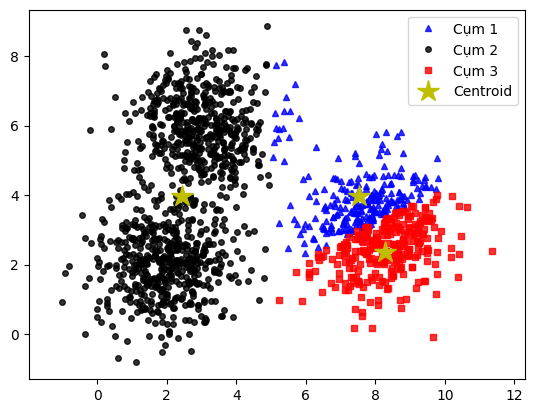

Loop 22


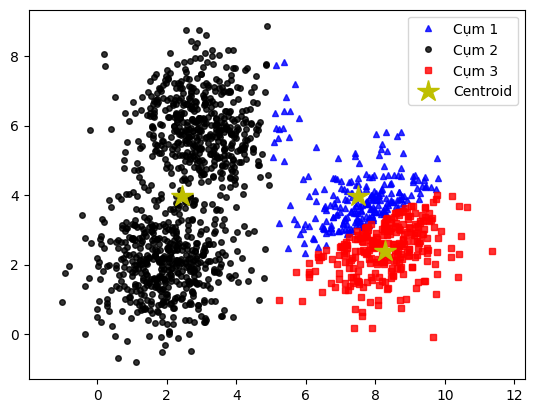

Loop 23


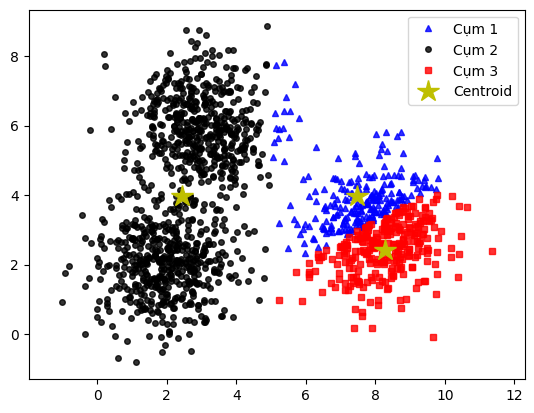

Loop 24


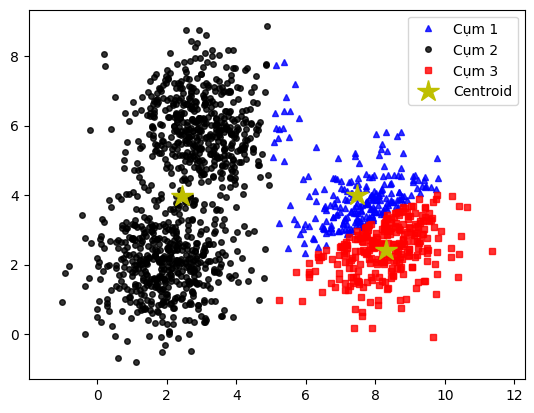

Loop 25


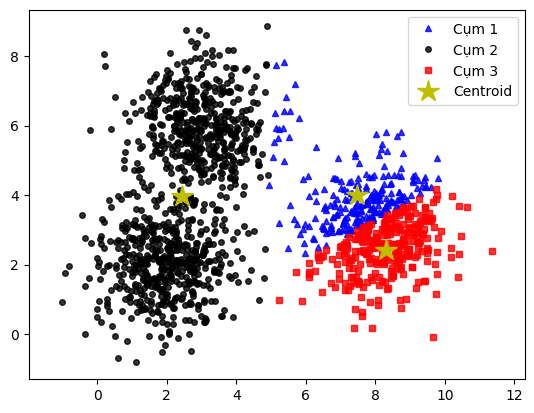

Loop 26


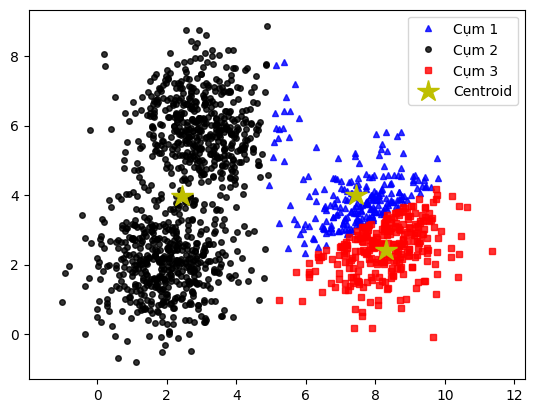

Loop 27


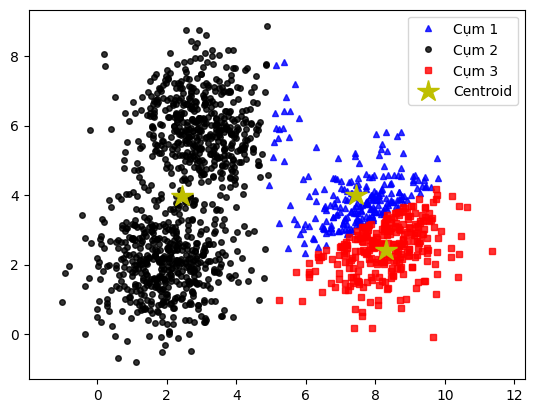

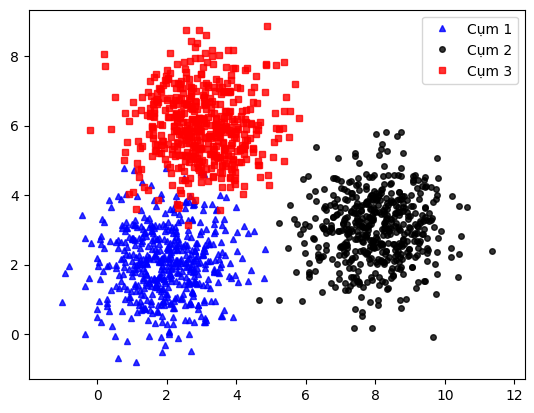

In [ ]:
### FAILED RESULT
(centers, labels, it) = kmeans(X, K)

kmeans_display(X, original_label)

In [ ]:
# Create a class
class Daylight:
    def __init__(self, name, lat, long, risetime, settime):
        """
        name: str
        lat: float
        long: float
        risetime: float
        settime: float
        """
        self.name = name
        self.lat = lat
        self.long = long
        self.risetime = risetime
        self.settime = settime